In [4]:
!pip list

Package                 Version
----------------------- ------------------
anaconda-anon-usage     0.4.4
appdirs                 1.4.4
appnope                 0.1.4
archspec                0.2.3
asttokens               2.4.1
boltons                 23.0.0
Brotli                  1.0.9
certifi                 2024.2.2
cffi                    1.16.0
chardet                 5.2.0
charset-normalizer      2.0.4
click                   8.1.7
comm                    0.2.2
conda                   24.3.0
conda-content-trust     0.2.0
conda-libmamba-solver   24.1.0
conda-package-handling  2.2.0
conda_package_streaming 0.9.0
contourpy               1.2.1
cryptography            42.0.5
cycler                  0.12.1
debugpy                 1.6.7
decorator               5.1.1
distro                  1.8.0
docker-pycreds          0.4.0
et-xmlfile              1.1.0
exceptiongroup          1.2.0
executing               2.0.1
filelock                3.13.1
fonttools               4.51.0
fsspec        

Original Bounding Box: (226, 222, 388, 417)
Transformed Bounding Box: (176, 195, 289, 376)


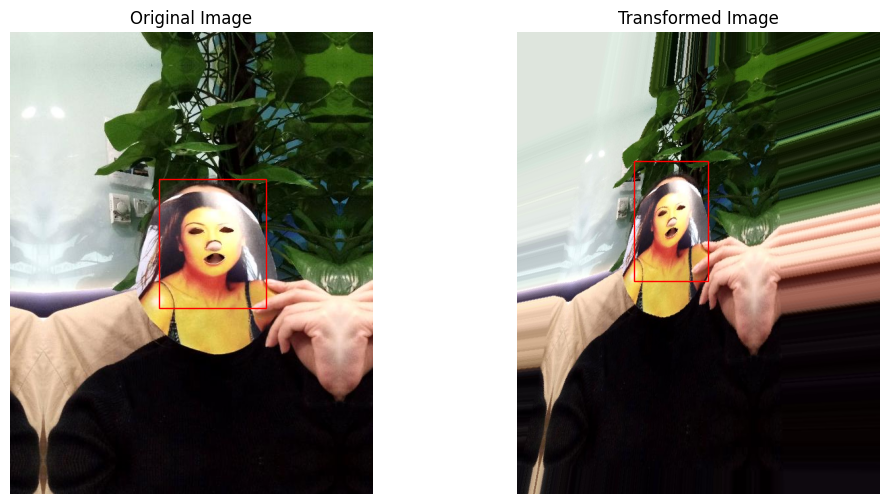

In [5]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from func import apply_homography,transform_bounding_box


img = io.imread('pic.png')

# Homography transformation matrix
tform_matrix = np.array([[3.41818141e+00,  6.69540689e-01, -4.56274360e+02],
                         [1.07093025e+00,  2.64093478e+00, -4.46848244e+02],
                         [1.57043311e-03,  1.29288901e-03,  1.00000000e+00]])

bb = [226, 222, 388, 417]
xmin, ymin, xmax, ymax = bb


# Apply the homography transformation
transformed_img = apply_homography(img, tform_matrix)
io.imsave('transformed_img.png',transformed_img)

# Transform the bounding box coordinates
transformed_xmin, transformed_ymin, transformed_xmax, transformed_ymax = transform_bounding_box(xmin, ymin, xmax, ymax, tform_matrix)

# Print the transformed bounding box coordinates
print(f'Original Bounding Box: {xmin, ymin, xmax, ymax}')
print(f'Transformed Bounding Box: ({transformed_xmin:.0f}, {transformed_ymin:.0f}, {transformed_xmax:.0f}, {transformed_ymax:.0f})')

# Display the original and transformed images with bounding boxes
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none'))
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(transformed_img)
plt.gca().add_patch(plt.Rectangle((transformed_xmin, transformed_ymin), transformed_xmax-transformed_xmin, transformed_ymax-transformed_ymin, linewidth=1, edgecolor='r', facecolor='none'))
plt.axis('off')

plt.show()